In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et

sns.set(font_scale=1.5)
sns.set_style("white")

data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


In [3]:
base_path = os.path.join("data", "spatial-vector-lidar")

country_boundary_path = os.path.join(base_path, "usa", "usa-boundary-dissolved.shp")

state_boundary_path = os.path.join(base_path, "usa", "usa-states-census-2014.shp")

pop_places_path = os.path.join(base_path, "global", "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")

country_boundary_us = gpd.read_file(country_boundary_path)
state_boundary_us = gpd.read_file(state_boundary_path)
pop_places = gpd.read_file(pop_places_path)

In [4]:
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [5]:
state_boundary_us.geom_type.head()

0    MultiPolygon
1         Polygon
2    MultiPolygon
3         Polygon
4         Polygon
dtype: object

In [6]:
state_boundary = state_boundary_us[['LSAD', 'geometry']]
cont_usa = state_boundary.dissolve(by='LSAD')

cont_usa

,geometry
LSAD,
00,"MULTIPOLYGON Z (((-89.65699 30.11838 0.00000, ..."


In [7]:
cont_usa.reset_index()

,LSAD,geometry
0,00,"MULTIPOLYGON Z (((-89.65699 30.11838 0.00000, ..."


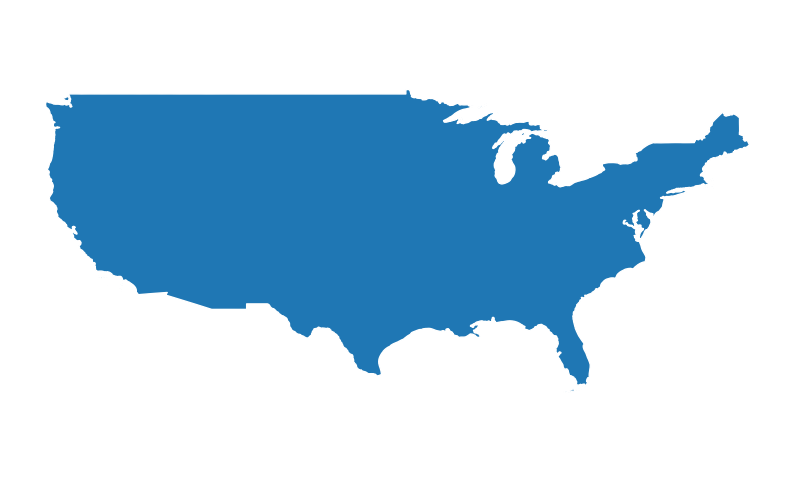

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
cont_usa.reset_index().plot(column='LSAD', ax=ax)

ax.set_axis_off()
plt.axis('equal')
plt.show() 

In [9]:
state_boundary = state_boundary_us[['region', 'geometry', 'ALAND', 'AWATER']]

regions_agg = state_boundary.dissolve(by='region', aggfunc='sum')
regions_agg

,geometry,ALAND,AWATER
region,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.89190 0.00000, ...",1943869253244,184383393833
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",869066138232,108922434345
Southeast,"MULTIPOLYGON Z (((-81.44310 30.60094 0.00000, ...",1364632039655,103876652998
Southwest,"POLYGON Z ((-94.41906 33.57722 0.00000, -94.38...",1462631530997,24217682268
West,"MULTIPOLYGON Z (((-118.35350 32.82196 0.00000,...",2432336444730,57568049509


In [10]:
regions_agg["land_ha"] = regions_agg["ALAND"] / 10000
regions_agg["water_ha"] = regions_agg["AWATER"] / 10000
regions_agg

,geometry,ALAND,AWATER,land_ha,water_ha
region,,,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.89190 0.00000, ...",1943869253244,184383393833,1.943869e+08,1.843834e+07
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",869066138232,108922434345,8.690661e+07,1.089224e+07
Southeast,"MULTIPOLYGON Z (((-81.44310 30.60094 0.00000, ...",1364632039655,103876652998,1.364632e+08,1.038767e+07
Southwest,"POLYGON Z ((-94.41906 33.57722 0.00000, -94.38...",1462631530997,24217682268,1.462632e+08,2.421768e+06
West,"MULTIPOLYGON Z (((-118.35350 32.82196 0.00000,...",2432336444730,57568049509,2.432336e+08,5.756805e+06


In [15]:
pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


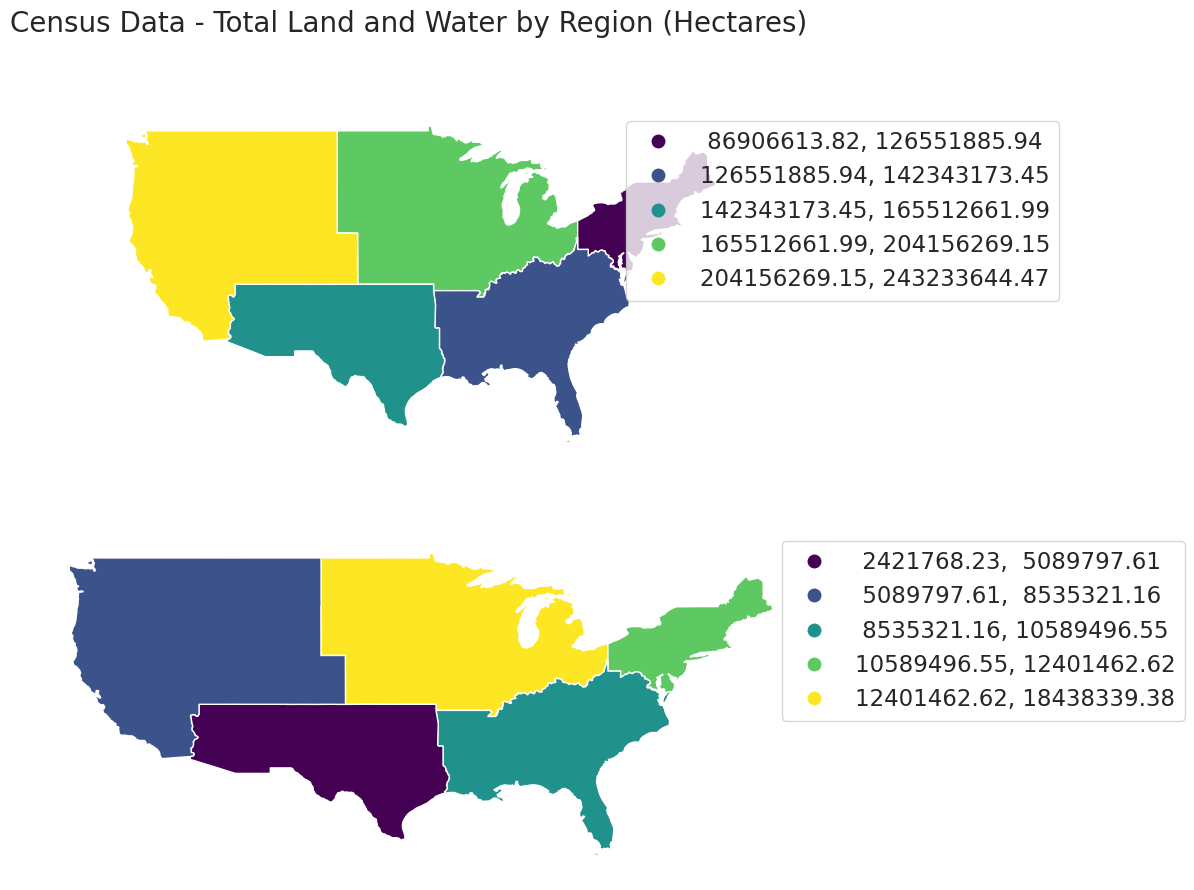

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

regions_agg.plot(column='land_ha', legend=True, scheme="quantiles", ax=ax1)

regions_agg.plot(column='water_ha', scheme="quantiles", legend=True, ax=ax2)

plt.suptitle('Census Data - Total Land and Water by Region (Hectares)', fontsize=20)
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()